### Task 2

"I have put a CSV file in an assignment folder in the **PFDA-courseware** repository.

Create a Jupyter notebook called `assignment2-weather.ipynb` that includes a well-designed plot of the temperature over time (`dryBulbTemperature_Celsius`).

#### Marks will be given for:
- Completing the assignment
- The visual quality of the plot

You may use **Pandas** if you wish to read in the data."


In [16]:

print("The version of pandas we are using is...")

import pandas as pd
print(pd.__version__)

The version of pandas we are using is...
2.2.3


In [17]:
## Let's start by reading 'weatherreadings1.csv' into a DF
data = pd.read_csv('weatherreadings1.csv')

## Let's print the first 5 rows of the .csv to check it's reading in OK
print(data.head())


                                 siteId        reportStartDateTime  \
0  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T16:15:00+00:00   
1  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T16:45:00+00:00   
2  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:00:00+00:00   
3  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:15:00+00:00   
4  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:30:00+00:00   

           reportEndDateTime  collectionName  isPublic  isLatestVersion  \
0  2024-10-02T16:15:00+00:00               1      True             True   
1  2024-10-02T16:45:00+00:00               1      True             True   
2  2024-10-02T17:00:00+00:00               1      True             True   
3  2024-10-02T17:15:00+00:00               1      True             True   
4  2024-10-02T17:30:00+00:00               1      True             True   

   observationType softwareType  windDirection  relativeHumidity  ...  isDcnn  \
0                1  WeatherLink            322 

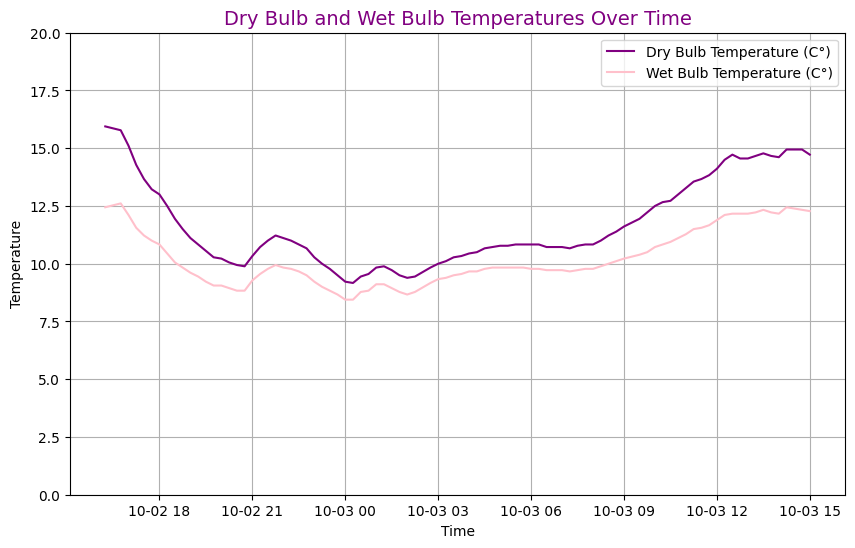

In [18]:
## We start by imorting Matplotlib's pyplot module

import matplotlib.pyplot as plt

## First attempt was ugly with the dates all smashed together so lets ensure the time column is converted to datetime objects.

data['reportEndDateTime'] = pd.to_datetime(data['reportEndDateTime'])

## Let's see what a plot that is 10" X 6" is like

plt.figure(figsize=(10, 6))

## We now use pyplot to plot time against temperature and define the legend.
## Added wet bulb for the craic
 
plt.plot (data['reportEndDateTime'], data['dryBulbTemperature_Celsius'], label='Dry Bulb Temperature (C°)', color='purple')
plt.plot (data['reportEndDateTime'], data['wetBulbTemperature_Celsius'], label='Wet Bulb Temperature (C°)', color='pink' )

## Label the x-axis
plt.xlabel("Time")

## Label the y-axis
plt.ylabel("Temperature")

## We'll add a title and a legend
plt.title('Dry Bulb and Wet Bulb Temperatures Over Time', fontsize=14, color='purple')
plt.grid(True)
plt.legend()

## Y-axis limits seem to default to the exact range of temps in the .csv. I like round numbers so let's change that to a range of 0 to 20 degrees Celsius
plt.ylim(0, 20)


plt.show()


There is a single latitude and longitude noted in the .csv. It would be nice to have some code to tell us where tha data was collected. We need to install the [geopy](https://geopy.readthedocs.io/en/stable/) module to do this. Let's use the [Nominatim](https://gis.stackexchange.com/questions/293615/user-agent-argument-in-nominatim-in-geopy) geolocation service to do this.

In [19]:
from geopy.geocoders import Nominatim

## Adapted from https://gis.stackexchange.com/questions/293615/user-agent-argument-in-nominatim-in-geopy
geolocator = Nominatim(user_agent="miriamsgeoapi")

## We know that the latitude and longitude values are in the first row of the DF so let's extract them

latitude = data['latitude'].iloc[0]
longitude = data['longitude'].iloc[0]

## Use geopy's reverse method to get the location name - from https://geopy.readthedocs.io/en/stable/
location = geolocator.reverse((latitude, longitude), exactly_one=True)

print(f"The bad weather we were observing was in....: {location.address}") 




The bad weather we were observing was in....: 62, Blackacre, Tuam, Tuam Municipal District, County Galway, Connacht, H54 V260, Éire / Ireland
